In [1]:
from crem.crem import grow_mol, mutate_mol
from rdkit import Chem
import pandas as pd

import mols2grid

In [2]:
db = '../crem_db/crem_db2.5.db'

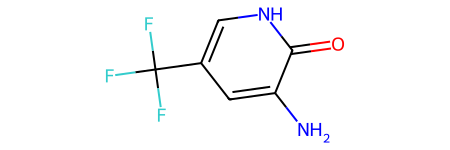

In [5]:
frag_smi = "Nc1cc(c[nH]c1=O)C(F)(F)F"
frag_mol = Chem.MolFromSmiles(frag_smi)
frag_mol

### CReM `grow` method:

In [ ]:
out_list = []
grow_list = list(grow_mol(frag_mol, db_name=db, return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])
    
df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])


In [5]:
df

,Idx,SMILES,Input_SMILES
0,0,CNc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,O=NNc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


### CReM `mutate` method

In [6]:
out_list = []
grow_list = list(mutate_mol(frag_mol, db_name=db,return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])

df2 = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

In [7]:
df2

,Idx,SMILES,Input_SMILES
0,0,Fc1cc(F)cc(C2=NCCN2)c1,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,FC(F)c1nc2ccccc2[nH]1,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,FC(F)Sc1nc2ccccc2[nH]1,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,Fc1cc(F)cc(-c2ccccc2)c1,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,Fc1ccc(-c2ccccc2)c(F)c1,Nc1cc(c[nH]c1=O)C(F)(F)F
...,...,...,...
480,480,O=C(O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
481,481,O=c1[nH]cc(C(F)(F)F)cc1[N+](=O)[O-],Nc1cc(c[nH]c1=O)C(F)(F)F
482,482,Nc1cc(C(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
483,483,Nc1cc(-c2ccccc2)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


In [8]:
smiles = df['SMILES'].values

In [9]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [10]:
mols2grid.display(mols,
                  size=(400, 250))

MolGridWidget()

In [11]:
frag_smi

'Nc1cc(c[nH]c1=O)C(F)(F)F'

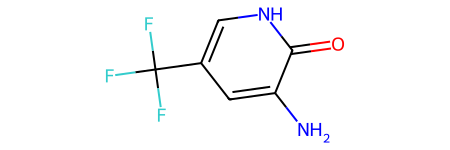

In [12]:
frag_mol

In [13]:
smiles2 = df2['SMILES'].values[:20]

In [14]:
mols2 = [Chem.MolFromSmiles(smile) for smile in smiles2]

In [15]:
mols2grid.display(mols2,
                  size=(400, 250))

MolGridWidget()

In [16]:
for smile in smiles:
    print(smile in df2['SMILES'].values)

False
False


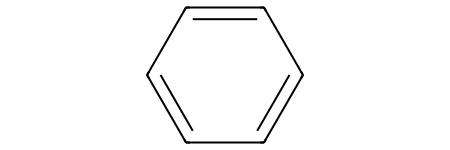

In [17]:
benzene = 'c1ccccc1'
benzene_mol = Chem.MolFromSmiles(benzene)
benzene_mol

In [18]:
out_list = []
grow_list = list(grow_mol(benzene_mol, db_name=db,return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])
    
df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

[20:20:21] WARNING: not removing hydrogen atom with dummy atom neighbors


In [19]:
smiles = df['SMILES'].to_list()

In [20]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [21]:
mols2grid.display(mols)

MolGridWidget()